In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic.csv')

In [19]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})
#data.dtypes

<AxesSubplot:xlabel='survived', ylabel='fare'>

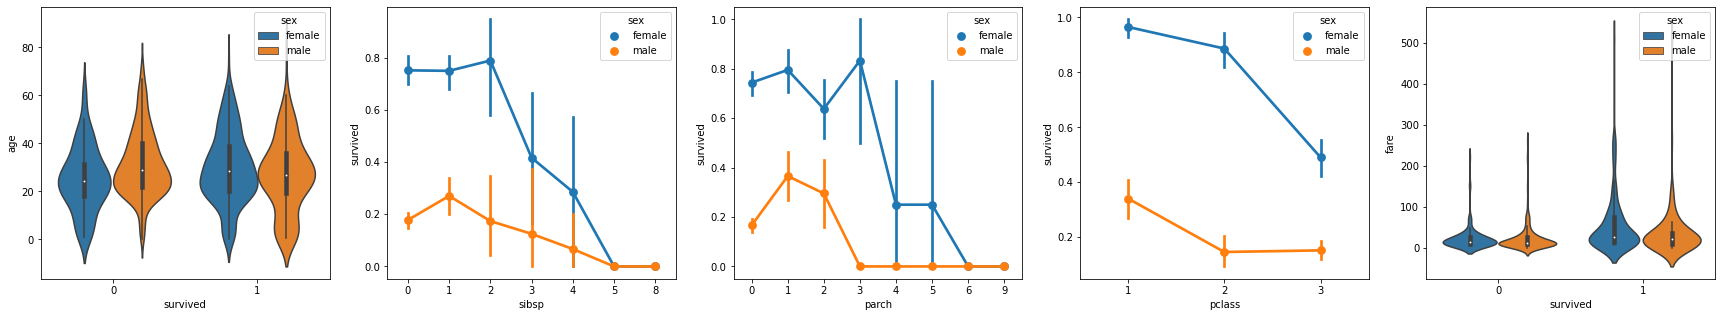

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [21]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [22]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [23]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [24]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
### Test the model

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [29]:
# Alternatively use Neural Network

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [30]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 17ms/step - loss: 0.6925 - accuracy: 0.5709
Epoch 2/50
27/27 [==============================] - 1s 20ms/step - loss: 0.6899 - accuracy: 0.6036
Epoch 3/50
27/27 [==============================] - 0s 15ms/step - loss: 0.6875 - accuracy: 0.5707
Epoch 4/50
27/27 [==============================] - 1s 19ms/step - loss: 0.6780 - accuracy: 0.6047
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 0.6644 - accuracy: 0.7168
Epoch 6/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6366 - accuracy: 0.7616
Epoch 7/50
27/27 [==============================] - 0s 14ms/step - loss: 0.6146 - accuracy: 0.7627
Epoch 8/50
27/27 [==============================] - 1s 45ms/step - loss: 0.5866 - accuracy: 0.7566
Epoch 9/50
27/27 [==============================] - 0s 11ms/step - loss: 0.5586 - accuracy: 0.7549
Epoch 10/50
27/27 [==============================] - 0s 12ms/step - loss: 0.5364 - accuracy: 0.7458
Epoch 11/

In [33]:
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))

0.7894736842105263
